<a href="https://colab.research.google.com/github/donghuna/AI-Expert/blob/main/%ED%95%98%EC%88%9C%ED%9A%8C/Lab1_CNN_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN ResNet

Let's train the ResNet-20 model on CIFAR10 using the following Block.

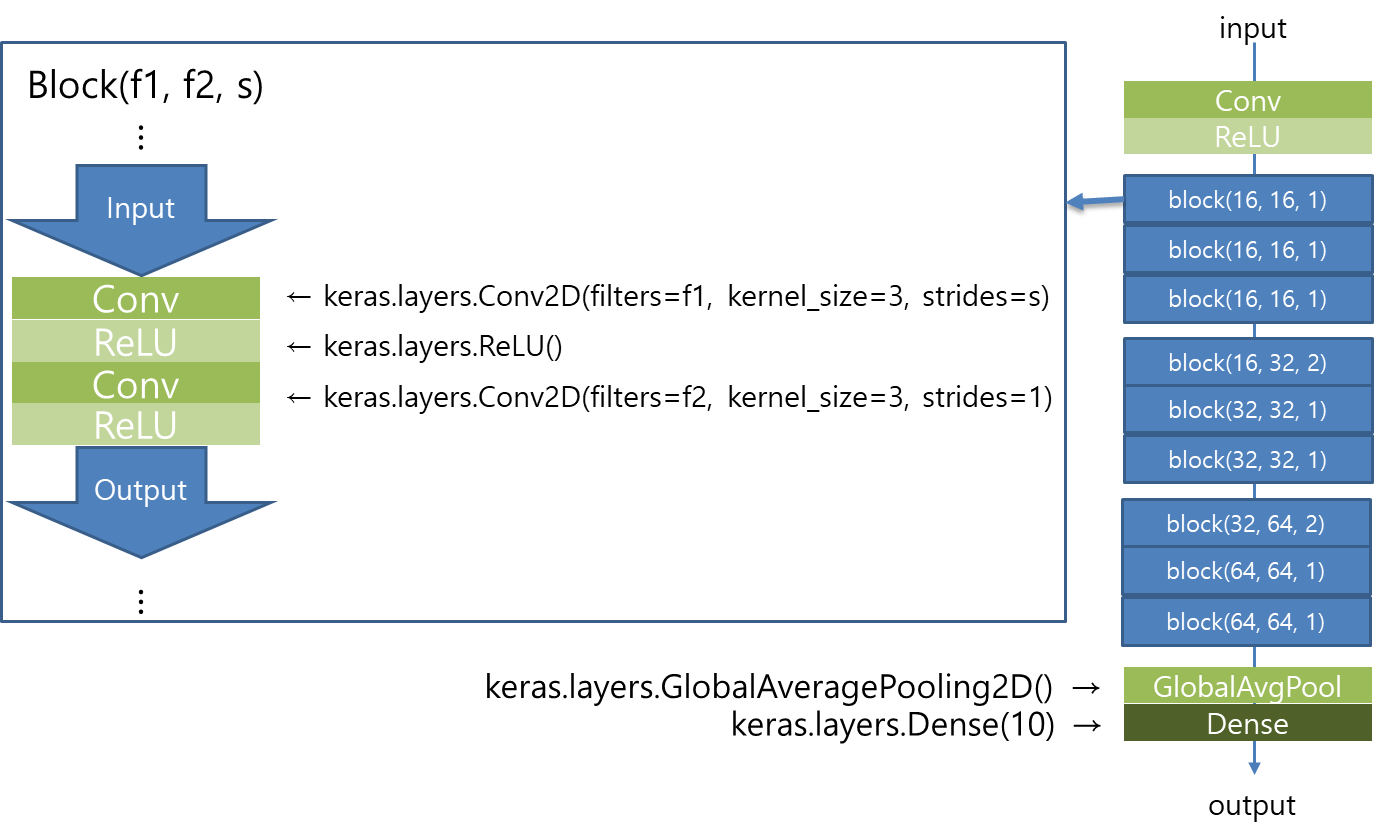

In [ ]:
!pip install tensorflow-model-optimization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

nb_classes = 10
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

train_y = keras.utils.to_categorical(train_y, nb_classes)
test_y = keras.utils.to_categorical(test_y, nb_classes)

170498071/170498071 [==============================] - 15s 0us/step


## Without Bacth normalization

In [ ]:
class Block(keras.layers.Layer):
  def __init__(self, f1, f2, s):
    super().__init__()
    kernel_initializer = 'he_normal'
    self.strides = s

    self.layers = keras.Sequential([
      # implement here
      # layers.Conv2D(),
      # layers.BatchNormalization(),
      # layers.ReLU(),
      # layers.Conv2D(),
      # layers.BatchNormalization()
    ])

  def call(self, inputs):
    x = self.layers(inputs)
    return x

class Network(keras.Model):
  def __init__(self):
    super().__init__()
    self.kernel_initializer = 'he_normal'

  def build(self, input_shape): # automatically called when first __call__ invokes.
    self.first_layer = keras.Sequential([
      layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', kernel_initializer=self.kernel_initializer),
      layers.ReLU()
    ])
    self.blocks = []
    filters_per_stage = [16, 32, 64]
    strides_of_first_block_per_stage = [1, 2, 2]
    repeats_per_stage = [3, 3, 3]
    for filters, strides, repeats in zip(filters_per_stage, strides_of_first_block_per_stage, repeats_per_stage):
      for _ in range(repeats):
        # implement blocks here
        # use self.blocks.append()
        strides = 1

    self.last_layer = keras.Sequential([
      layers.GlobalAveragePooling2D(),
      layers.Flatten(),
      layers.Dense(10, kernel_initializer=self.kernel_initializer)
    ])

  def call(self, inputs): # automatically called in __call__ after build().
    x = self.first_layer(inputs)

    #implement blocks call here

    x = self.last_layer(x)

    return x

model = Network()
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.005),
              metrics=['accuracy'])

epoch = 7
batch_size = 128
model.fit(x=train_x, y=train_y, batch_size=batch_size, epochs=epoch, validation_data=(test_x, test_y))

print(model.summary())

Epoch 1/7
391/391 [==============================] - 20s 23ms/step - loss: 1.4598 - accuracy: 0.4528 - val_loss: 8.3312 - val_accuracy: 0.3121
Epoch 2/7
391/391 [==============================] - 8s 19ms/step - loss: 1.1061 - accuracy: 0.5993 - val_loss: 2.6550 - val_accuracy: 0.4562
Epoch 3/7
391/391 [==============================] - 8s 19ms/step - loss: 0.9615 - accuracy: 0.6531 - val_loss: 1.7470 - val_accuracy: 0.5408
Epoch 4/7
391/391 [==============================] - 8s 19ms/step - loss: 0.8517 - accuracy: 0.6965 - val_loss: 1.3084 - val_accuracy: 0.6058
Epoch 5/7
391/391 [==============================] - 8s 19ms/step - loss: 0.7767 - accuracy: 0.7243 - val_loss: 1.1550 - val_accuracy: 0.6241
Epoch 6/7
391/391 [==============================] - 8s 20ms/step - loss: 0.7212 - accuracy: 0.7456 - val_loss: 1.1317 - val_accuracy: 0.6547
Epoch 7/7
391/391 [==============================] - 8s 19ms/step - loss: 0.6748 - accuracy: 0.7642 - val_loss: 0.9298 - val_accuracy: 0.7009
Model

## With Batch normalization
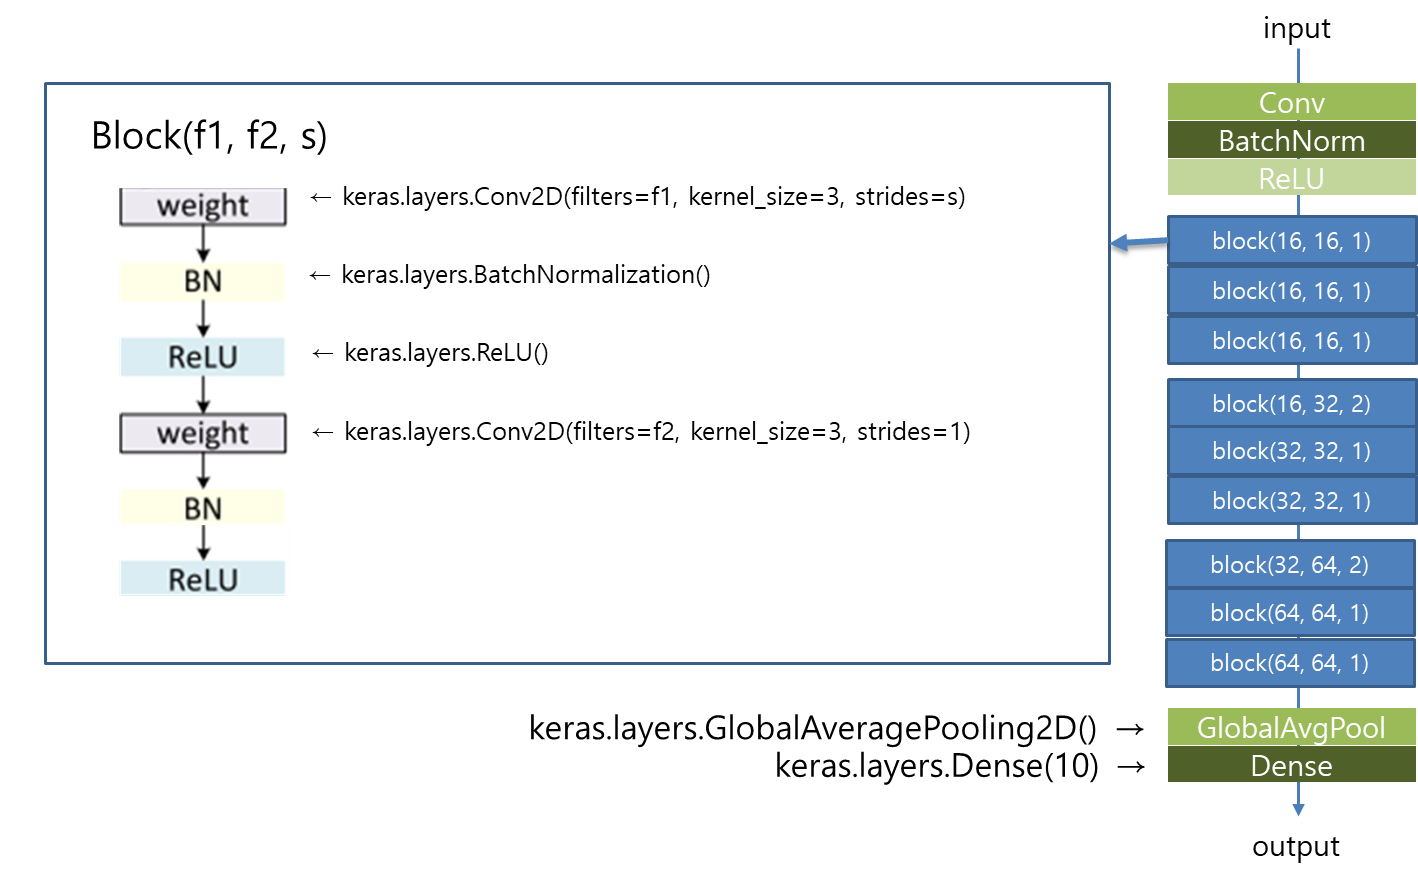

In [ ]:
class ResNetBlock(keras.layers.Layer):
  def __init__(self, f1, f2, s):
    super().__init__()
    kernel_initializer = 'he_normal'
    self.strides = s

    self.residual = keras.Sequential([
      # implement here
      # layers.Conv2D(),
      # layers.BatchNormalization(),
      # layers.ReLU(),
      # layers.Conv2D(),
      # layers.BatchNormalization()
    ])

    # layers.Identity()
    if s == 2:
      self.shortcut = keras.Sequential([
        # implement here
      ])
    else:
      self.shortcut = keras.Sequential([
        # implement here
      ])

  def call(self, inputs):
    # implement here
    # add residual and shortcut

    return x

class ResNet(keras.Model):
  def __init__(self):
    super().__init__()
    self.kernel_initializer = 'he_normal'

  def build(self, input_shape): # automatically called when first __call__ invokes.
    self.first_layer = keras.Sequential([
      layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', kernel_initializer=self.kernel_initializer),
      layers.BatchNormalization(),
      layers.ReLU()
    ])

    self.blocks = []
    # implement blocks here
    # use self.blocks.append()
    # using for() can make code short

    self.last_layer = keras.Sequential([
      layers.GlobalAveragePooling2D(),
      layers.Flatten(),
      layers.Dense(10, kernel_initializer=self.kernel_initializer)
    ])

  def call(self, inputs): # automatically called in __call__ after build().
    x = self.first_layer(inputs)

    #implement blocks call here

    return x

model = ResNet()
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

epoch = 7
batch_size = 128
model.fit(x=train_x, y=train_y, batch_size=batch_size, epochs=epoch, validation_data=(test_x, test_y))

print(model.summary())


Epoch 1/7
391/391 [==============================] - 20s 25ms/step - loss: 1.3957 - accuracy: 0.4931 - val_loss: 1.8364 - val_accuracy: 0.4404
Epoch 2/7
391/391 [==============================] - 8s 22ms/step - loss: 0.9876 - accuracy: 0.6470 - val_loss: 1.4265 - val_accuracy: 0.5308
Epoch 3/7
391/391 [==============================] - 8s 22ms/step - loss: 0.8122 - accuracy: 0.7131 - val_loss: 1.2192 - val_accuracy: 0.5933
Epoch 4/7
391/391 [==============================] - 8s 22ms/step - loss: 0.6904 - accuracy: 0.7570 - val_loss: 1.0255 - val_accuracy: 0.6653
Epoch 5/7
391/391 [==============================] - 8s 22ms/step - loss: 0.5983 - accuracy: 0.7890 - val_loss: 0.8664 - val_accuracy: 0.7136
Epoch 6/7
391/391 [==============================] - 8s 22ms/step - loss: 0.5275 - accuracy: 0.8156 - val_loss: 1.0257 - val_accuracy: 0.6650
Epoch 7/7
391/391 [==============================] - 8s 22ms/step - loss: 0.4626 - accuracy: 0.8387 - val_loss: 0.8603 - val_accuracy: 0.7241
Model